In [46]:
import pandas
import numpy
import joypy

import matplotlib.pyplot as plt

In [47]:
fl = "/Users/simondi/PROJECTS/target_infect_x_project/src/tix-analysis/data/kmeans-fit-profile.tsv"

In [3]:
tab = pandas.read_csv(fl, sep="\t")

In [4]:
tab["Iteration"] = list(range(0, tab.shape[0]))

In [5]:
tab

,left_bound,k,right_bound,within_cluster_variance,explained_variance,total_variance,percent_loss,Iteration
0,0,0,0,1131.612347,0.000000,1131.612347,1.000000,0
1,2,10,10,433.445097,0.616967,1131.612347,0.000000,1
2,2,6,11,566.825691,0.499099,1131.612347,0.191044,2
3,6,8,11,497.783985,0.560111,1131.612347,0.092154,3
4,8,9,11,463.847188,0.590101,1131.612347,0.043546,4
5,9,10,11,433.445097,0.616967,1131.612347,0.000000,5


In [76]:
tab["k"].values.argsort()[1]

2

In [10]:
tab

,left_bound,k,right_bound,within_cluster_variance,explained_variance,total_variance,percent_loss,Iteration
0,0,0,0,1131.612347,0.000000,1131.612347,1.000000,0
1,2,10,10,433.445097,0.616967,1131.612347,0.000000,1
2,2,6,11,566.825691,0.499099,1131.612347,0.191044,2
3,6,8,11,497.783985,0.560111,1131.612347,0.092154,3
4,8,9,11,463.847188,0.590101,1131.612347,0.043546,4
5,9,10,11,433.445097,0.616967,1131.612347,0.000000,5


In [11]:
reference_model = tab.loc[[tab["k"].idxmax()]]
reference_model["Ref"] = "Reference"
reference_model

,left_bound,k,right_bound,within_cluster_variance,explained_variance,total_variance,percent_loss,Iteration,Ref
1,2,10,10,433.445097,0.616967,1131.612347,0.0,1,Reference


In [38]:
selected_model = tab.loc[[tab.shape[0] - 1]]
selected_model["Ref"] = "Selected K"
selected_model

,left_bound,k,right_bound,within_cluster_variance,explained_variance,total_variance,percent_loss,Iteration,Ref
3,6,8,11,497.783985,0.560111,1131.612347,0.092154,3,Selected K


In [13]:
min_model = tab.loc[[tab["k"].idxmin()]]
min_model["Ref"] = "No Cluster"
min_model

,left_bound,k,right_bound,within_cluster_variance,explained_variance,total_variance,percent_loss,Iteration,Ref
0,0,0,0,1131.612347,0.0,1131.612347,1.0,0,No Cluster


In [36]:
tab["explained_variance"].values[2]

0.4990990570156357

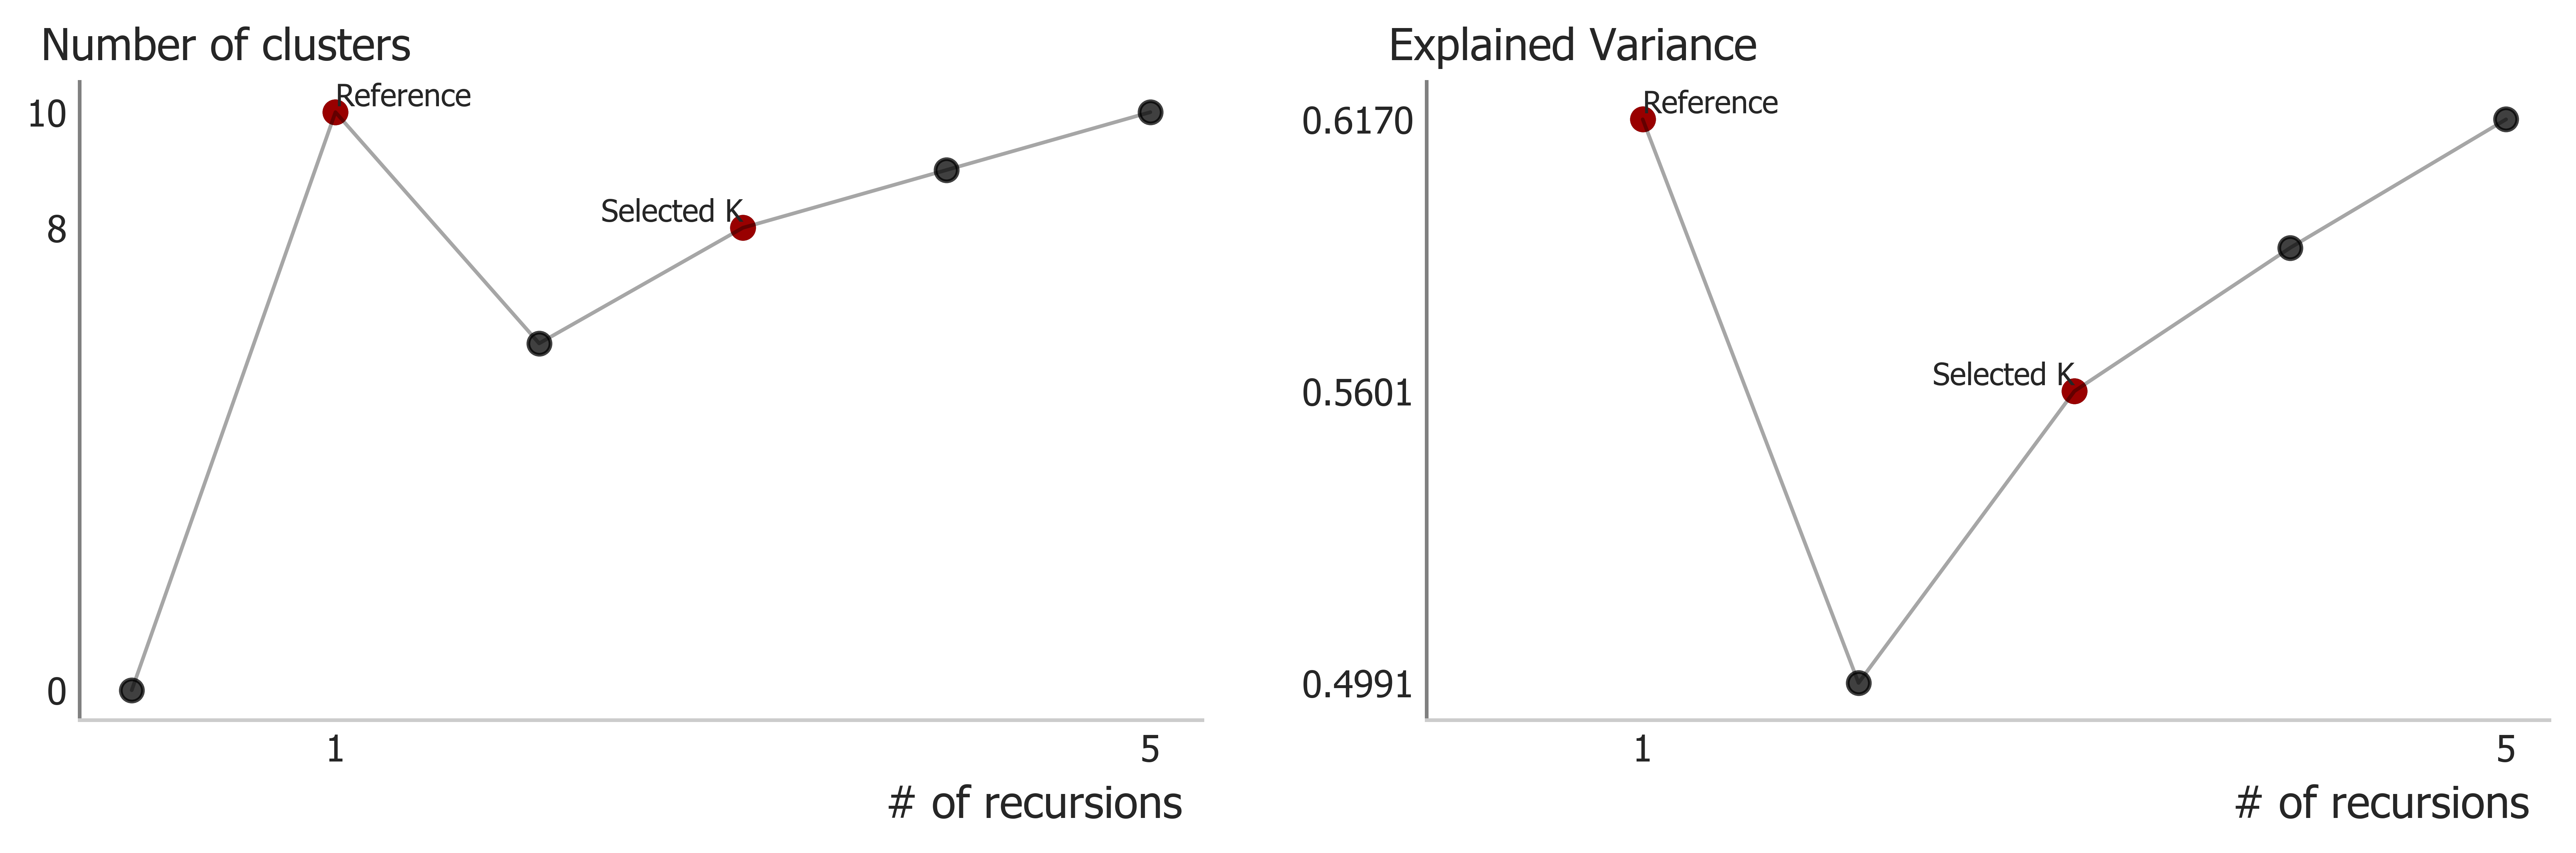

In [63]:
plt.style.use(["seaborn-whitegrid"])
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma']

fig = plt.figure(figsize=(12, 7), dpi=720)

ax = plt.subplot(221)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_color('grey')
ax.xaxis.set_label_coords(x=.85, y=-0.1)
ax.yaxis.set_ticks([min_model["k"].values, selected_model["k"].values, reference_model["k"].values])
ax.yaxis.set_label_coords(x=-0.05, y=.885)
ax.xaxis.set_ticks([1, tab["Iteration"].values[-1]])
ax.grid(linestyle="")

plt.scatter(tab["Iteration"].values, tab["k"].values, color="black", alpha=.75)
plt.plot(tab["Iteration"].values, tab["k"].values, color="black", alpha=.35, lw=1)
plt.scatter(reference_model["Iteration"].values, reference_model["k"].values, color="#990000", alpha=1)
plt.scatter(selected_model["Iteration"].values, selected_model["k"].values, color="#990000", alpha=1)

ax.text(reference_model["Iteration"].values , reference_model["k"].values, "Reference", ha="left", va="bottom", fontsize="smaller")
ax.text(selected_model["Iteration"].values, selected_model["k"].values, "Selected K", ha="right", va="bottom", fontsize="smaller")

xmin, xmax = ax.get_xlim() 
ymin, ymax = ax.get_ylim()

plt.xlabel("# of recursions", fontsize=12)
plt.ylabel("", fontsize=15)
plt.title("Number of clusters", x=0.13, fontsize=12)

ax = plt.subplot(222)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_color('grey')
ax.xaxis.set_label_coords(x=.85, y=-0.1)
ax.yaxis.set_ticks([tab["explained_variance"].values[2],
                    selected_model["explained_variance"].values,
                    reference_model["explained_variance"].values])
ax.yaxis.set_label_coords(x=-0.05, y=.885)
ax.grid(linestyle="")

plt.scatter(tab["Iteration"].values[1:], tab["explained_variance"].values[1:], color="black", alpha=.75)
plt.plot(tab["Iteration"].values[1:], tab["explained_variance"].values[1:], color="black", alpha=.35, lw=1)
plt.scatter(reference_model["Iteration"].values, reference_model["explained_variance"].values, color="#990000", alpha=1)
plt.scatter(selected_model["Iteration"].values, selected_model["explained_variance"].values, color="#990000", alpha=1)

ax.text(reference_model["Iteration"].values , reference_model["explained_variance"].values, "Reference", ha="left", va="bottom", fontsize="smaller")
ax.text(selected_model["Iteration"].values, selected_model["explained_variance"].values, "Selected K", ha="right", va="bottom", fontsize="smaller")

ax.set_xlim([0, ax.get_xlim()[1]])
ax.xaxis.set_ticks([1, tab["Iteration"].values[-1]])
xmin, xmax = ax.get_xlim() 
ymin, ymax = ax.get_ylim()

plt.xlabel("# of recursions", fontsize=12)
plt.ylabel("", fontsize=15)
plt.title("Explained Variance", x=0.13, fontsize=12)
plt.show()

In [61]:
ax.get_xlim()[1]

6.0

In [48]:
import glob

In [49]:
cluster_files = "/Users/simondi/PROJECTS/target_infect_x_project/src/tix-analysis/data/kmeans-fit/"
fls = glob.glob(cluster_files + "*cluster_sizes.tsv")

In [50]:
import re

In [51]:
reg = re.compile(".*kmeans-fit-K(\d+)_cluster_sizes.tsv")

In [151]:
tabs = [None] * len(fls)
for i, fl in enumerate(fls):    
    t = pandas.read_csv(fl, sep="\t", header=-1, names="c")
    idx = int(reg.match(fl).group(1))
    t["index"] = str(idx).zfill(9)
    tabs[i] = [idx, t]
tabs = sorted(tabs, key=lambda x: x[0])
tabs = list(filter(lambda x: x[0] in tab["k"].values , tabs))
df = pandas.concat(map(lambda x: x[1], tabs))

In [53]:
list(map(lambda x: "K = {}".format(x[0]), tabs))

['K = 6', 'K = 8', 'K = 9', 'K = 10']

/Users/simondi/miniconda3/envs/tix/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


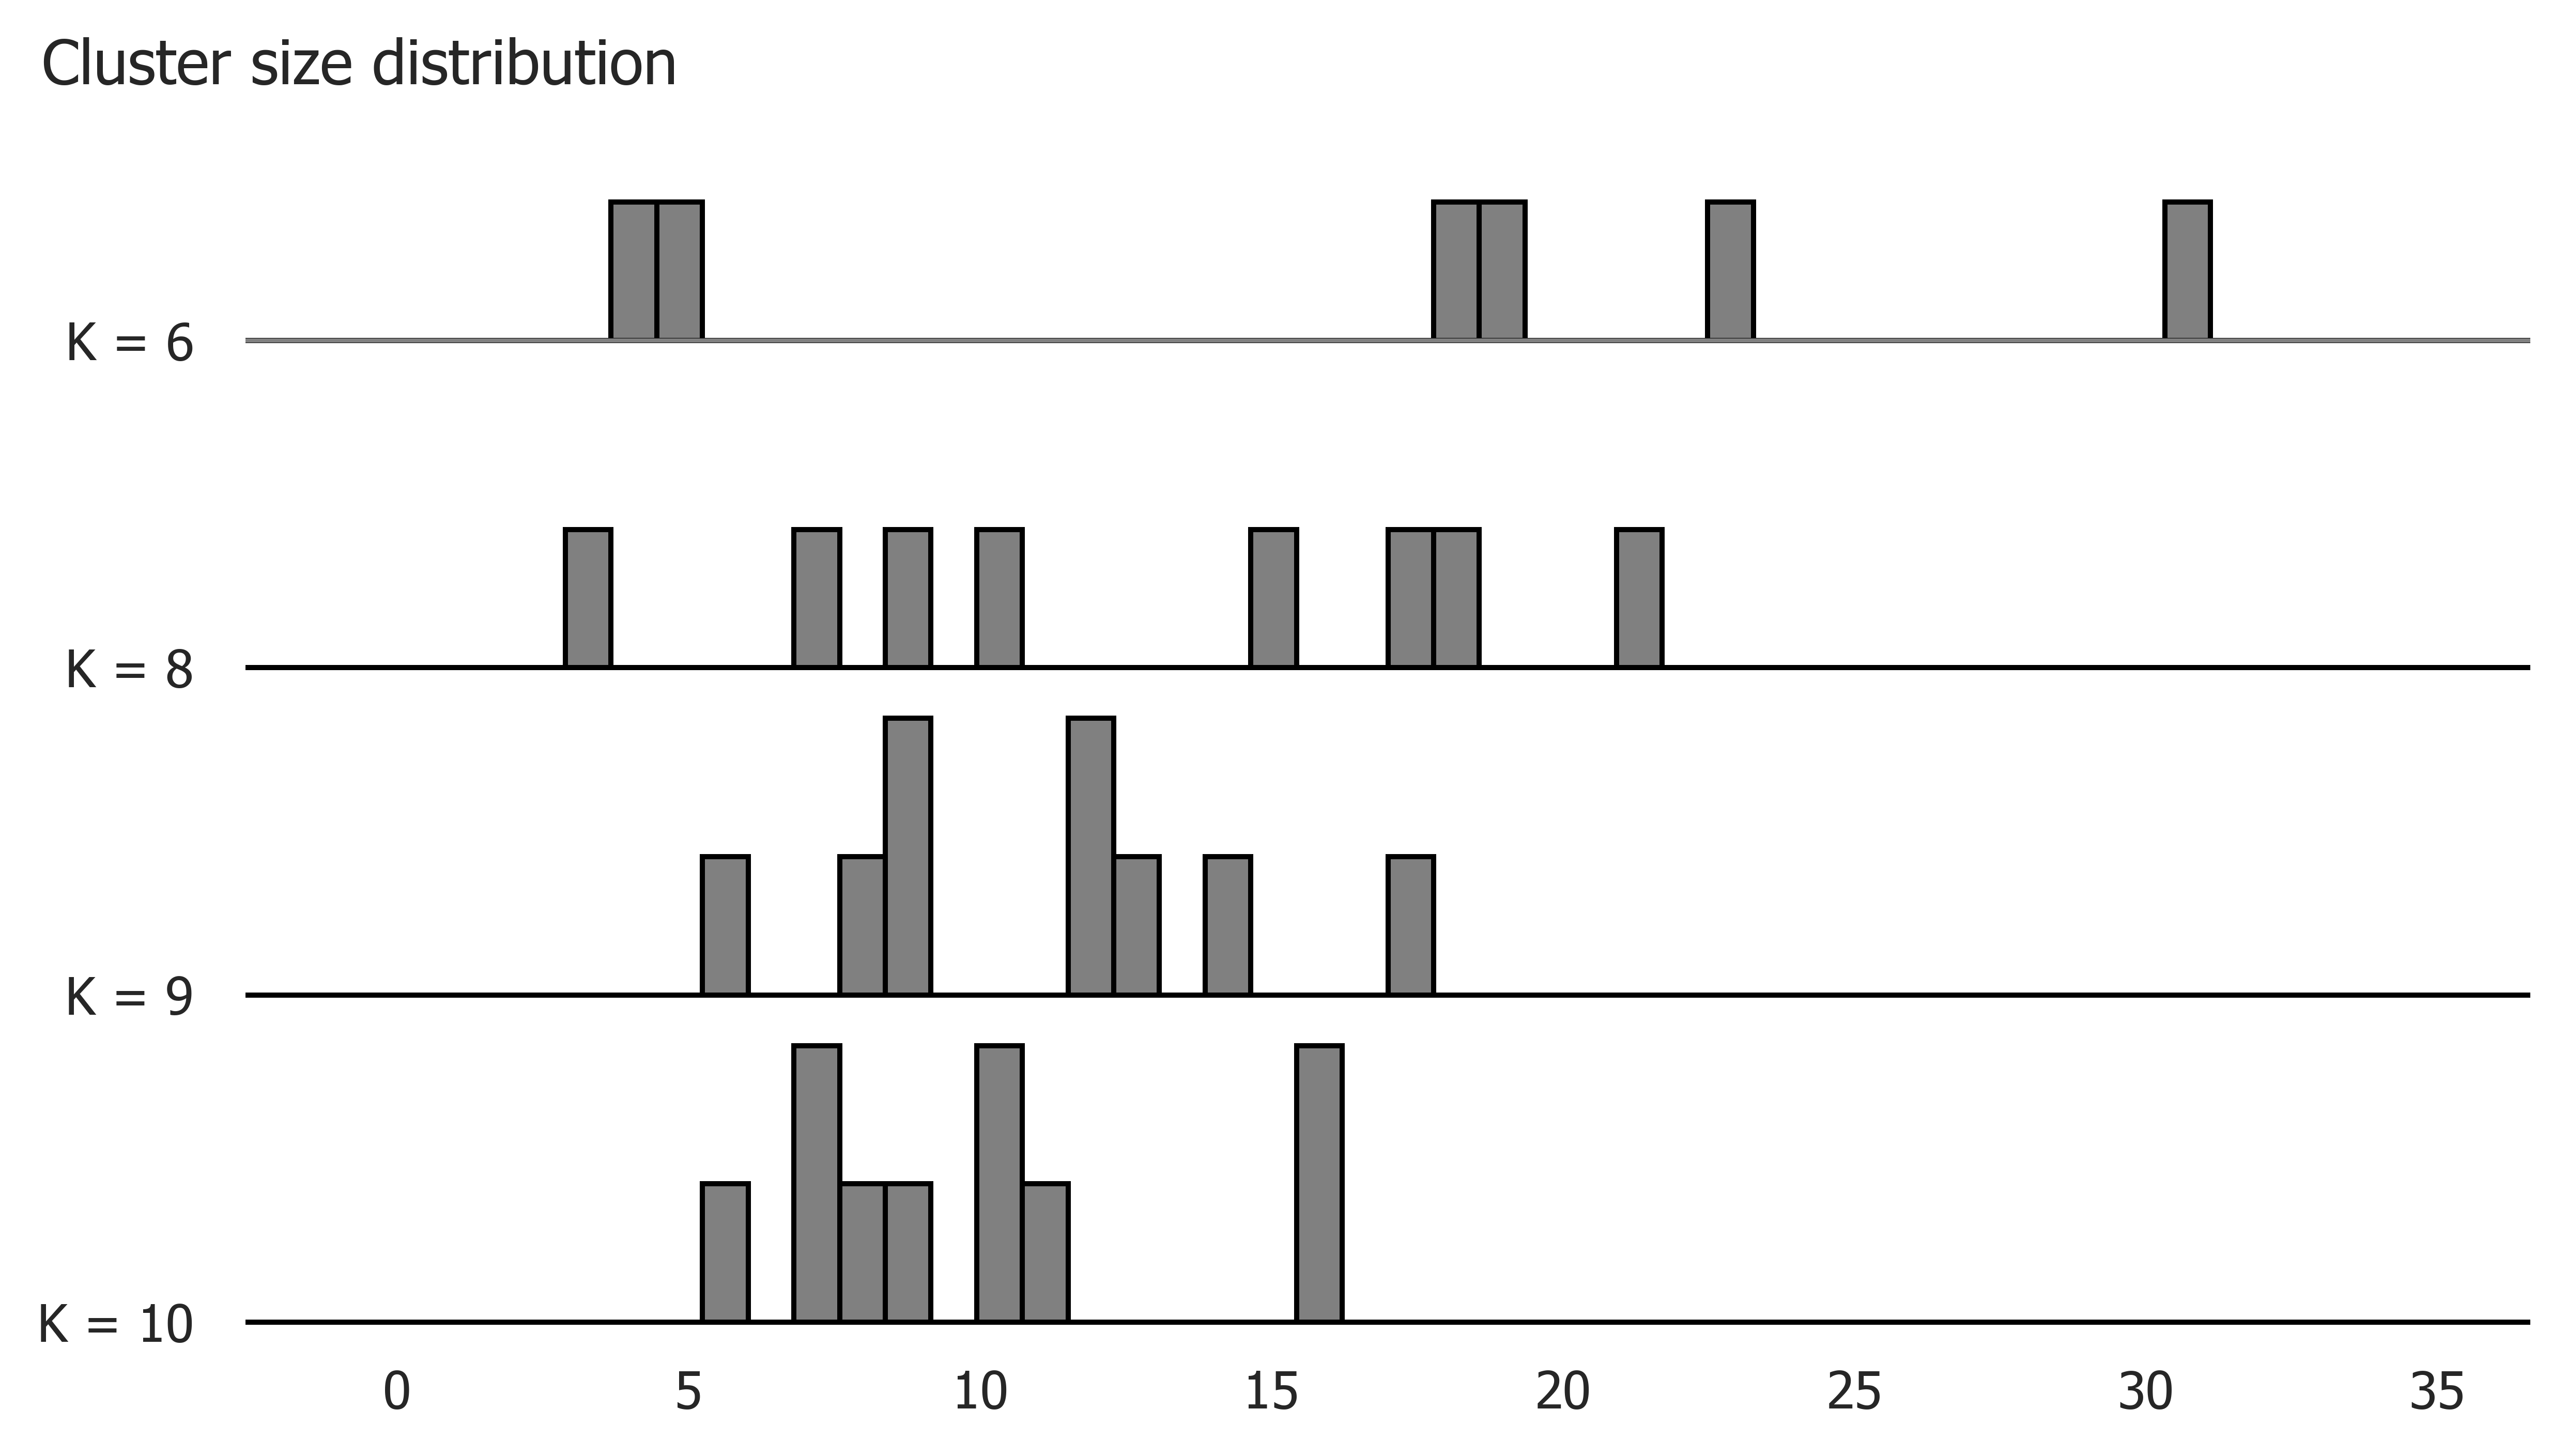

In [56]:
plt.style.use(["seaborn-whitegrid"])
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma']

_, ax = plt.subplots(figsize=(7, 4), dpi=720)
fig, axes = joypy.joyplot(df, by="index", hist="True", ax=ax,
                          bins=50, overlap=0, grid="y", color="grey",
                          labels=list(map(lambda x: "K = {}".format(x[0]), tabs)))
for x in axes:
    x.spines['bottom'].set_color('grey')
    x.grid(color="grey",axis="y")
plt.title("Cluster size distribution", x=.05, y=.9)
plt.show()

In [60]:
tabs = list(filter(lambda x: x[0] in tab["k"].values , tabs))

In [144]:
k = df.groupby("index").quantile([0, 0.25, 0.5, 0.75, 1])

In [147]:
df["index"] = "K" + format(df["index"].astype(int))

In [155]:
s = df.groupby("index").quantile([0, 0.25, 0.5, 0.75, 1]).unstack("index")["c"]

In [165]:
s["quantile"] = list(map(lambda x: x,s.index))

In [167]:
s.columns = k

Index(['000000006', '000000008', '000000009', '000000010', 'k', 'quantile'], dtype='object', name='index')

In [100]:
isinstance(s, pandas.DataFrame)

True

In [168]:
s

index,000000006,000000008,000000009,000000010,k,quantile
0.00,4.00,3.00,6.0,6.00,0.00,0.00
0.25,8.25,8.50,9.0,7.25,0.25,0.25
0.50,18.50,12.50,12.0,9.50,0.50,0.50
0.75,22.00,17.25,13.0,10.75,0.75,0.75
1.00,31.00,21.00,17.0,16.00,1.00,1.00
